In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show(title, image):
    height = image.shape[0]
    width = image.shape[1]
    #image = cv2.resize(image, (width, height))
    image = cv2.resize(image, (int(width*0.4), int(height*0.4)))
    cv2.imshow(title, image)
def found(img):
    #red_channel = img[:,:,1]
    sum = np.count_nonzero(img == 255)
    all = np.size(img)
    
    print('hairpixels:',sum)
    print('imagepixels:',all,' should be: ', img.shape[0]*img.shape[1])
    print('percentage:', (sum/all)*100)
    
    return sum
def process(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((3,3), np.uint8)
    edges = cv2.Canny(gray,40,200,kernel)
    
    #hmmm I dont like dilate and erosion. gives way to many hairs.
    #img_dilation = cv2.dilate(edges, kernel, iterations =1)
    #img_erosion = cv2.erode(img_dilation, kernel, iterations = 1)
    
    #show('original', img)
    #show('canny', edges)
    #show('dilation', img_dilation)
    #show('erode', img_erosion)
    #show('inversion', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return img, edges

In [96]:
def intensity(orig, edges):
    
    print('hi')
    binary = np.ones(img.shape[:2], dtype="uint8")
    binary[:,:] = (img != 0) # 0 or 1 depending on wehter it is ==0
    #where binary = 1 
    intensity = binary * orig
    show('intensity',intensity)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [97]:
def dectect(path):
    orig,img = process(path)
    found(img)
    intensity(img,img)
    return orig,img

In [98]:
orig,img = detect('HairTest1_18Hairs.png')

hairpixels: 104085
imagepixels: 5857280  should be:  5857280
percentage: 1.7770193673513988


In [80]:
orig,img = detect('Mummel_6_long.jpg')

hairpixels: 114670
imagepixels: 12192768  should be:  12192768
percentage: 0.9404755343495422


In [81]:
orig,img = detect('Mummel_12_long_dense.jpg')

hairpixels: 120673
imagepixels: 12192768  should be:  12192768
percentage: 0.98970963771311


In [82]:
orig,img = detect('Mummel_12_long_loose.jpg')

hairpixels: 154968
imagepixels: 12192768  should be:  12192768
percentage: 1.2709829302091207


In [83]:
orig,img = detect('Mummel_1.jpg')

hairpixels: 10539
imagepixels: 9204120  should be:  9204120
percentage: 0.11450307036414127


In [52]:
def diff(orig, img):
    h = orig.shape[0]
    w = orig.shape[1]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
    res = orig.copy()
    thresh = np.ones(image_in.shape[:2], dtype="uint8") * 255
    thresh[:,:] = (img != 0) # 0 or 1 depending on wehter it is ==0
    res = 100+gray*0.2
    
    
    
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            colors = orig[y,x]
            #print(img[y,x])
            if int(img[y,x]) == 0: # if black, no hair found.
                #lets make it a much lighter shade of the original
                res[y, x] = 100+gray[y,x]*0.2
            else:
                res[y,x] = [255,0,0]#colors-100 #ahir pixel will be 
    show('original', orig)
    show('diff', res)
    show('gray', gray)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [32]:
def diff(orig, img):
    h = orig.shape[0]
    w = orig.shape[1]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
    res = orig.copy()
    thresh = np.ones(orig.shape[:2], dtype="uint8")
    thresh[:,:] = (img != 0) # 0 or 1 depending on wehter it is ==0

    print(gray)
    gray = 255+(gray*0.2)
    print(gray)
    res = (100+gray*0.2)*(thresh)
   
    found(img)
    
    
    show('gray', gray)
    show('res', res)
    show('original', orig)
    show('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
diff(orig, img)

[[161 160 157 ... 164 159 160]
 [158 161 158 ... 163 158 161]
 [156 160 158 ... 163 158 162]
 ...
 [186 184 185 ... 128 130 129]
 [188 186 186 ... 130 132 128]
 [187 186 187 ... 132 134 126]]
[[287.2 287.  286.4 ... 287.8 286.8 287. ]
 [286.6 287.2 286.6 ... 287.6 286.6 287.2]
 [286.2 287.  286.6 ... 287.6 286.6 287.4]
 ...
 [292.2 291.8 292.  ... 280.6 281.  280.8]
 [292.6 292.2 292.2 ... 281.  281.4 280.6]
 [292.4 292.2 292.4 ... 281.4 281.8 280.2]]
104085


In [53]:
diff(orig,img)

In [10]:
detect('blonde on black-1.png')

In [31]:
detect('very large hair bunch.jpg')

In [25]:

cpdef unsigned char[:, :] threshold_fast(int T, unsigned char [:, :] image):
    # set the variable extension types
    cdef int x, y, w, h
    
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] >= T else 0
    
    # return the thresholded image
    return image

SyntaxError: invalid syntax (<ipython-input-25-71a28675c926>, line 1)

In [17]:
import cython

ModuleNotFoundError: No module named 'cython'

In [11]:
print(orig)

[[[159 158 167]
  [158 157 166]
  [155 154 163]
  ...
  [162 161 170]
  [157 156 165]
  [158 157 166]]

 [[156 155 164]
  [159 158 167]
  [156 155 164]
  ...
  [161 160 169]
  [156 155 164]
  [159 158 167]]

 [[154 153 162]
  [158 157 166]
  [156 155 164]
  ...
  [161 160 169]
  [156 155 164]
  [160 159 168]]

 ...

 [[179 188 185]
  [177 186 183]
  [178 187 184]
  ...
  [110 131 129]
  [112 133 131]
  [111 132 130]]

 [[181 190 187]
  [179 188 185]
  [179 188 185]
  ...
  [112 133 131]
  [114 135 133]
  [110 131 129]]

 [[180 189 186]
  [179 188 185]
  [180 189 186]
  ...
  [114 135 133]
  [116 137 135]
  [108 129 127]]]


In [23]:
def do_things(a):
    print(a ,"end")
    return a

In [24]:
import numpy as np
example = orig
def fast():
     img = example.copy()
     height, width, depth = img.shape
     do_things(img[0:height, 0:width])
        # DO THIS INSTEAD
     return img 
fast()

[[[159 158 167]
  [158 157 166]
  [155 154 163]
  ...
  [162 161 170]
  [157 156 165]
  [158 157 166]]

 [[156 155 164]
  [159 158 167]
  [156 155 164]
  ...
  [161 160 169]
  [156 155 164]
  [159 158 167]]

 [[154 153 162]
  [158 157 166]
  [156 155 164]
  ...
  [161 160 169]
  [156 155 164]
  [160 159 168]]

 ...

 [[179 188 185]
  [177 186 183]
  [178 187 184]
  ...
  [110 131 129]
  [112 133 131]
  [111 132 130]]

 [[181 190 187]
  [179 188 185]
  [179 188 185]
  ...
  [112 133 131]
  [114 135 133]
  [110 131 129]]

 [[180 189 186]
  [179 188 185]
  [180 189 186]
  ...
  [114 135 133]
  [116 137 135]
  [108 129 127]]] end


array([[[159, 158, 167],
        [158, 157, 166],
        [155, 154, 163],
        ...,
        [162, 161, 170],
        [157, 156, 165],
        [158, 157, 166]],

       [[156, 155, 164],
        [159, 158, 167],
        [156, 155, 164],
        ...,
        [161, 160, 169],
        [156, 155, 164],
        [159, 158, 167]],

       [[154, 153, 162],
        [158, 157, 166],
        [156, 155, 164],
        ...,
        [161, 160, 169],
        [156, 155, 164],
        [160, 159, 168]],

       ...,

       [[179, 188, 185],
        [177, 186, 183],
        [178, 187, 184],
        ...,
        [110, 131, 129],
        [112, 133, 131],
        [111, 132, 130]],

       [[181, 190, 187],
        [179, 188, 185],
        [179, 188, 185],
        ...,
        [112, 133, 131],
        [114, 135, 133],
        [110, 131, 129]],

       [[180, 189, 186],
        [179, 188, 185],
        [180, 189, 186],
        ...,
        [114, 135, 133],
        [116, 137, 135],
        [108, 129, 127]]

In [3]:
def slow():
     img = example.copy()
     height, width, depth = img.shape
     for i in range(0, height):             #looping at python speed...
         for j in range(0, (width//4)):     #...
             for k in range(0,depth):       #...
                 img[i,j,k] = 0
     return img
slow()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 

In [103]:
newhigh = 255
oldhigh = 200
newlow = oldlow = 40
intensity = 0
print(newlow + ((newhigh - newlow) / (oldhigh - oldlow)) * (intensity -oldlow))

-13.75


In [8]:
import numpy as np
a = np.array([0,1,5,3,4])
a2 = a[1::2]
a2

array([1, 3])

In [1]:
#https://stackoverflow.com/questions/43923648/region-growing-python
import cv2
import numpy as np

def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1

    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))

    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))

    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    return out

def region_growing(img, seed):
    list = []
    outimg = np.zeros_like(img)
    list.append((seed[0], seed[1]))
    processed = []
    while(len(list) > 0):
        pix = list[0]
        outimg[pix[0], pix[1]] = 255
        for coord in get8n(pix[0], pix[1], img.shape):
            if img[coord[0], coord[1]] != 0:
                outimg[coord[0], coord[1]] = 255
                if not coord in processed:
                    list.append(coord)
                processed.append(coord)
        list.pop(0)
        cv2.imshow("progress",outimg)
        cv2.waitKey(1)
    return outimg

def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print ('Seed: ' + str(x) + ', ' + str(y), img[y,x])
        clicks.append((y,x))

clicks = []
image = cv2.imread('canny.png', 0)
ret, img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
cv2.namedWindow('Input')
cv2.setMouseCallback('Input', on_mouse, 0, )
cv2.imshow('Input', img)
cv2.waitKey()
seed = clicks[-1]
out = region_growing(img, seed)
cv2.imshow('Region Growing', out)
cv2.waitKey()
cv2.destroyAllWindows()

Seed: 65, 163 0
Seed: 229, 252 255
Seed: 292, 252 0
Seed: 361, 285 0
Seed: 338, 324 0
Seed: 351, 260 0
Seed: 380, 220 0
Seed: 239, 118 0
Seed: 244, 104 255
Seed: 167, 176 0


In [3]:
import numpy as np
data = np.array(['intensitySum'],['hairpixels'])
print(data)

TypeError: data type not understood

In [4]:
np_array_1s = np.array([[1,2,3],[1,2,3]])
print(np_array_1s)
print(np_array_1s[1])

[[1 2 3]
 [1 2 3]]
[1 2 3]


In [12]:
a = np.array([8.74611600e+06, 5.87693672e+01, 1.48821000e+05, 6.10735600e+06,
 2.43675004e+00, 6.10735600e+06, 1.53000000e+02, 1.51000000e+02,
 5.57416300e+06, 9.12696591e-01, 5.33193000e+05, 3.53107947e+03,
 5.78168273e-04, 3.07140597e+07,5.54202668e+03, 2.48154810e+07,
])
b = a[4::10]
print(b)

[2.43675004e+00 5.54202668e+03]


50
0.11867244896097898


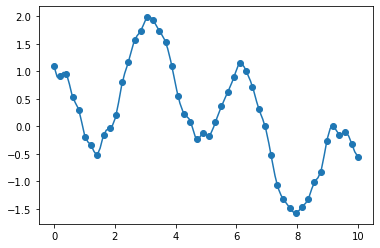

In [6]:
from matplotlib.pyplot import subplots
from numpy import linspace, random, sin, cos
from scipy import interpolate
import numpy as np

x = linspace(0, 10)

y = sin(x * .5) + cos (x * 2)  + random.randn(x.size) * 1e-1
# fit spline
print(np.size(x))
spl = interpolate.InterpolatedUnivariateSpline(x, y)
fitx = linspace(0, x.max(), 100)

fig, ax = subplots()
ax.scatter(x, y)

ax.plot(fitx, spl(fitx))
print(spl(2))

In [1]:
30/5.79*0.84

4.352331606217616

In [2]:
10/2.43*0.912

3.7530864197530867

In [3]:
40/7.26*0.81

4.462809917355373

In [4]:
50/8.69*0.829

4.769850402761795

In [5]:
60/7.96*0.84

6.331658291457287

In [6]:
60/14*0.64

2.742857142857143

In [7]:
14*0.64

8.96

In [8]:
7.96*0.84

6.6864

In [9]:
14/0.64

21.875

In [10]:
7.96/0.84

9.476190476190476

In [77]:
import numpy as np
amount = np.array([1, 10, 20, 30,40,50,60])#  ,60,20,22,22])
perc = np.array([0.71,2.43,5.46,5.79,7.26,8.69,7.96])#,14,7.3,5.038,5.074,])
outr = np.array([0.859,0.912,0.811,0.84,0.81,0.826,0.84])#,0.64,0.567,0.85,0.852])
secn= np.array([12,151,545,462,591,690,590])
mean = np.mean(outr)
std = np.std(outr)
res = perc/(1-outr)
print(res)
print(mean)
res2 = perc/(1.1-outr)
res3 = perc/(1.535-outr)

[ 5.03546099 27.61363636 28.88888889 36.1875     38.21052632 49.94252874
 49.75      ]
0.8425714285714284


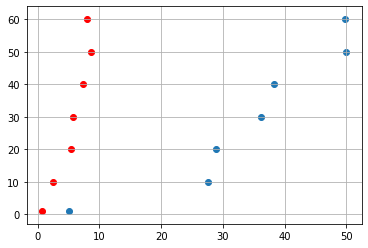

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(perc,amount,color= 'red')
ax.grid()
ax.scatter(res, amount)
#ax.scatter(res2,amount,color='green')
#ax.scatter(res3,amount)

[ 12 151 545 462 591 690 590]
[0.859 0.912 0.811 0.84  0.81  0.826 0.84 ]
[0.71 2.43 5.46 5.79 7.26 8.69 7.96]
[0.05916667 0.01609272 0.01001835 0.01253247 0.01228426 0.0125942
 0.01349153]


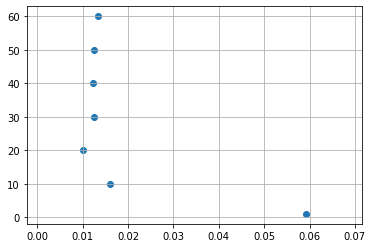

In [97]:
fig, ax = plt.subplots()
#ax.scatter(secn,amount,color= 'red')
#ax.scatter(secn*perc,amount)
ax.scatter(perc/secn,amount)
print(secn)
print(outr)
print(perc)
print(perc/secn)
ax.grid()

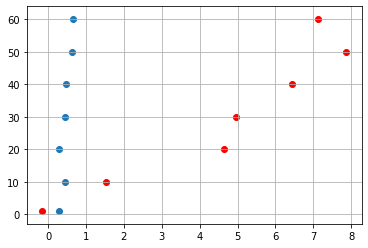

In [93]:
fig,ax = plt.subplots()
ax.scatter(perc/1-outr,amount,color = 'red')
ax.scatter((perc/(1-outr))*perc/secn,amount)
ax.grid()